# 机器学习经典实例：监督学习

### 1 数据预处理技术

在真实世界中，经常需要处理大量的原始数据，这些原始数据是机器学习算法无法理解的。
为了让机器学习算法理解原始数据，需要对数据进行预处理。

#### 1.1 准备工作

In [1]:
import numpy as np
from sklearn import preprocessing

In [2]:
data = np.array([[3, -1.5, 2, -5.4], [0, 4, -0.3, 2.1], [1, 3.3, -1.9, -4.3]])

In [3]:
data

array([[ 3. , -1.5,  2. , -5.4],
       [ 0. ,  4. , -0.3,  2.1],
       [ 1. ,  3.3, -1.9, -4.3]])

#### 1.2 详细步骤

1. 均值移除（Mean removal），通常把每个特征的平均值移除，以保证特征均值为0，即标准化，消除特征彼此间的偏差（bias）

In [4]:
data_standardized = preprocessing.scale(data)
print("Mean =\n", data_standardized.mean(axis=0))
print("Std deviation =\n", data_standardized.std(axis=0))

Mean =
 [  5.55111512e-17  -1.11022302e-16  -7.40148683e-17  -7.40148683e-17]
Std deviation =
 [ 1.  1.  1.  1.]


2. 范围缩放（Scaling），数据点中每个特征的数值范围可能变化很大，因此，有时将特征的数值范围缩放到合理的大小是非常重要的

In [5]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled = data_scaler.fit_transform(data)
print("Min max scaled data =\n", data_scaled)

Min max scaled data =
 [[ 1.          0.          1.          0.        ]
 [ 0.          1.          0.41025641  1.        ]
 [ 0.33333333  0.87272727  0.          0.14666667]]


3. 归一化（Normalization），用于需要对特征向量的值进行调整时，以保证每个特征向量的值都缩放到相同的数值范围

> 机器学习中最常用的归一化形式就是将特征向量调整为L1范数，使特征向量的数值之和为1

>  L0范数表示向量中非0的元素的个数（一般不用）；L1范数表示向量中所有元素的绝对值和（求权值的稀疏矩阵）；L2范数表示欧氏距离（岭回归；防止过拟合）

In [6]:
data_normalized = preprocessing.normalize(data, norm='l1')
print("L1 normalized data =\n", data_normalized)

L1 normalized data =
 [[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]


4. 二值化（Binarization），用于将数值特征向量转换为布尔类型向量

In [7]:
data_binarized = preprocessing.Binarizer(threshold=1.4).transform(data)
print("Binarized data =\n", data_binarized)

Binarized data =
 [[ 1.  0.  1.  0.]
 [ 0.  1.  0.  1.]
 [ 0.  1.  0.  0.]]


5. 独热编码（One-Hot Encoding），可以把独热编码看作是一种收紧（tighten）特征向量的工具。它把特征向量的每个特征与特征的非重复总数相对应，通过one-of-k的形式对每个值进行编码特征向量的每个特征值都按照这种方式编码，这样可以更加有效地表示空间。

> 到目前为止，表示分类变量最常用的方法就是使用one-hot 编码（one-hot-encoding）或N取一编码（one-out-of-N encoding），也叫虚拟变量（dummy variable）。虚拟变量背后的思想是将一个分类变量替换为一个或多个新特征，新特征取值为0和1。对于线性二分类（以及scikit-learn 中其他所有模型）的公式而言，0和1这两个值是有意义的，我们可以像这样对每个类别引入一个新特征，从而表示任意数量的类别。

> 比如说，workclass 特征的可能取值包括"Government Employee"、"Private Employee"、"Self Employed" 和"Self Employed Incorporated"。为了编码这4个可能的取值，我们创建了4个新特征，分别叫作"Government Employee"、"Private Employee"、"SelfEmployed" 和"Self Employed Incorporated"。如果一个人的workclass 取某个值，那么对应的特征取值为1，其他特征均取值为0。因此，对每个数据点来说，4个新特征中只有一个的取值为1。这就是它叫作one-hot编码或N取一编码的原因。

In [8]:
encoder = preprocessing.OneHotEncoder()
encoder.fit([[0, 2, 1, 12], [1, 3, 5, 3], [2, 3, 2, 12], [1, 2, 4, 3]])
encoded_vector = encoder.transform([[2, 3, 5, 3]]).toarray()
print("Encoded vector =\n", encoded_vector)

Encoded vector =
 [[ 0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.]]


#### 1.3 标记编码方法

在监督学习中，经常需要处理各种各样的标记。这些标记可能是数字，也可能是单词。如果
标记是数字，那么算法可以直接使用它们，但是，许多情况下，标记都需要以人们可理解的形式
存在，因此，人们通常会用单词标记训练数据集。标记编码就是要把单词标记转换成数值形式，
让算法懂得如何操作标记。

In [9]:
from sklearn import preprocessing

# 定义一个标记编码器
label_encoder = preprocessing.LabelEncoder()

# 创建标记
input_classes = ['audi', 'ford', 'audi', 'toyota', 'ford', 'bmw']

# 为标记编码
label_encoder.fit(input_classes)
print("Class mapping:")
for i, item in enumerate(label_encoder.classes_):
    print(item, '-->', i)

Class mapping:
audi --> 0
bmw --> 1
ford --> 2
toyota --> 3


In [10]:
# 转换标记
labels = ['toyota', 'ford', 'audi']
encoded_labels = label_encoder.transform(labels)
print("Labels =\n", labels)
print("Encoded labels =\n", list(encoded_labels))

Labels =
 ['toyota', 'ford', 'audi']
Encoded labels =
 [3, 2, 0]


In [11]:
# 数字反转回标记内容
encoded_labels = [2, 1, 0, 3, 1]
decoded_labels = label_encoder.inverse_transform(encoded_labels)
print("Encoded labels =\n", encoded_labels)
print("Decoded labels =\n", list(decoded_labels))

Encoded labels =
 [2, 1, 0, 3, 1]
Decoded labels =
 ['ford', 'bmw', 'audi', 'toyota', 'bmw']


#### 1.4 创建线性回归器

回归是估计输入数据与连续值输出数据之间关系的过程。数据通常是实数形式的，我们的目
标是估计满足输入到输出映射关系的基本函数。

* 线性回归的目标是提取输入变量与输出变量的关联线性模型，这就要求实际输出与线性方程预测的输出的残差平方和（sum of squares of differences）最小化。这种方法被称为普通最小二乘法（Ordinary Least Squares，OLS）。

1. 准备数据

In [12]:
import numpy as np
X = []
y = []
with open('../data/classic/data_singlevar.txt', 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

2. 分割数据

 * 建立机器学习模型时，需要用一种方法来验证模型，检查模型是否达到一定的满意度（satisfactory level）。为了实现这个方法，把数据分成两组：训练数据集（training dataset）与测试数据集（testing dataset）。训练数据集用来建立模型，测试数据集用来验证模型对未知数据的学习效果。

In [13]:
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# 训练数据
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# 测试数据
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

3. 创建一个回归器对象来训练模型

In [14]:
from sklearn import linear_model

# 创建线性回归对象
linear_regressor = linear_model.LinearRegression()
# 用训练数据集训练模型
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

4. 拟合数据

In [15]:
import matplotlib.pyplot as plt

y_train_pred = linear_regressor.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')

> 在前面的代码中，我们用训练的模型预测了训练数据的输出结果，但这并不能说明模型
对未知的数据也适用，因为我们只是在训练数据上运行模型。这只能体现模型对训练数据的拟合
效果。从上图中可以看到，模型训练的效果很好。

5. 用模型对测试数据集进行预测并画图

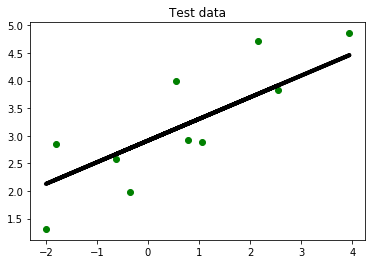

In [16]:
y_test_pred = linear_regressor.predict(X_test)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Test data')

#### 1.5 计算回归准确性

现在已经建立了回归器，接下来最重要的就是如何评价回归器的拟合效果。在模型评价的相
关内容中，用误差（error）表示实际值与模型预测值之间的差值。

> 常用误差指标：
  平均绝对误差（mean absolute error）：这是给定数据集的所有数据点的绝对误差平均值。  
  均方误差（mean squared error）：这是给定数据集的所有数据点的误差的平方的平均值。这是最流行的指标之一。  
  中位数绝对误差（median absolute error）：这是给定数据集的所有数据点的误差的中位数。这个指标的主要优点是可以消除异常值（outlier）的干扰。测试数据集中的单个坏点
不会影响整个误差指标，均值误差指标会受到异常点的影响。  
  解释方差分（explained variance score）：这个分数用于衡量我们的模型对数据集波动的解释能力。如果得分1.0分，那么表明我们的模型是完美的。  
  R方得分（R2 score）：这个指标读作“R方”，是指确定性相关系数，用于衡量模型对未
知样本预测的效果。最好的得分是1.0，值也可以是负数。

In [17]:
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 0.54
Mean squared error = 0.38
Median absolute error = 0.54
Explained variance score = 0.68
R2 score = 0.68


#### 1.6 保存模型数据

模型训练结束之后，如果能够把模型保存成文件，那么下次再使用的时候，只要简单地加载
就可以了。

In [18]:
import pickle

# 保存模型
output_model_file = 'saved_model.pkl'
with open(output_model_file, 'wb+') as f:
    pickle.dump(linear_regressor, f)

# 取出并使用模型
with open(output_model_file, 'rb') as f:
    model_linregr = pickle.load(f)

y_test_pred_new = model_linregr.predict(X_test)
print("New mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))

New mean absolute error = 0.54


#### 1.7 创建岭回归器

线性回归的主要问题是对异常值敏感。在真实世界的数据收集过程中，经常会遇到错误的度量结果。而线性回归使用的普通最小二乘法，其目标是使平方误差最小化。这时，由于异常值误差的绝对值很大，因此会引起问题，从而破坏整个模型。

普通最小二乘法在建模时会考虑每个数据点的影响，因此，最终模型就会像图1-4显示的直线那样。显然，我们发现这个模型不是最优的。为了避免这个问题，我们引入正则化项的系数作为阈值来消除异常值的影响。这个方法被称为岭回归。

In [19]:
ridge_regressor = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)

In [20]:
X = []
y = []
with open('../data/classic/data_multivar.txt', 'r') as f:
    for line in f.readlines():
        x1, x2, x3, yt = [float(i) for i in line.split(',')]
        X.append([x1, x2, x3])
        y.append(yt)

num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# 训练数据
X_train = np.array(X[:num_training]).reshape((num_training,3))
y_train = np.array(y[:num_training])

# 测试数据
X_test = np.array(X[num_training:]).reshape((num_test,3))
y_test = np.array(y[num_training:])

In [21]:
ridge_regressor.fit(X_train, y_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_ridge), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred_ridge), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred_ridge), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred_ridge), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred_ridge), 2))

Mean absolute error = 3.95
Mean squared error = 23.15
Median absolute error = 3.69
Explain variance score = 0.84
R2 score = 0.83


#### 1.8 创建多项式回归器

线性回归模型有一个主要的局限性，那就是它只能把输入数据拟合成直线，而多项式回归模
型通过拟合多项式方程来克服这类问题，从而提高模型的准确性。

#### 1.9 估算房屋价格

使用带AdaBoost算法的决策树回归器（decision tree regressor）来解决房屋价格估算问题。

> AdaBoost算法是指自适应增强（adaptive boosting）算法，这是一种利用其他系统增强模型准确性的技术。这种技术是将不同版本的算法结果进行组合，用加权汇总的方式获得最终结果，被称为弱学习器（weak learners）。AdaBoost算法在每个阶段获取的信息都会反馈到模型中，这样学习器就可以在后一阶段重点训练难以分类的样本。这种学习方式可以增强系统的准确性。

In [22]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [23]:
# 加载数据
housing_data = datasets.load_boston()

# 打乱并分离数据 参数random_state用来控制如何打乱数据，让我们可以重新生成结果
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

# 创建训练集与测试集
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [24]:
# 拟合一个决策树回归模型
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [25]:
# 用带AdaBoost算法的决策树回归模型进行拟合
ab_regressor =AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [26]:
# 评价决策树回归器的训练效果
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)

print("#### Decision Tree performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82


In [27]:
# 评价AdaBoost算法改善的效果

y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab)
print("#### AdaBoost performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### AdaBoost performance ####
Mean squared error = 7.64
Explained variance score = 0.91


> 结果表明，AdaBoost算法可以让误差更小，且解释方差分更接近1。

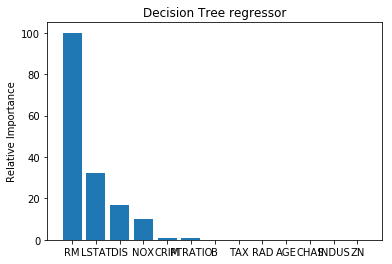

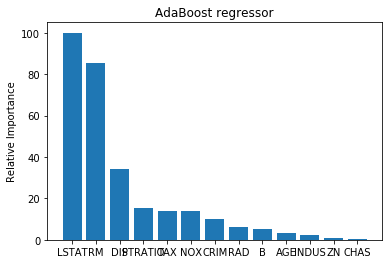

In [28]:
# 计算特征的相对重要性

def plot_feature_importances(feature_importances, title, feature_names):
    # 将重要性值标准化
    feature_importances = 100.0 * (feature_importances / max(feature_importances))
    # 将得分从高到低排序
    index_sorted = np.flipud(np.argsort(feature_importances))
    # 让X坐标轴上的标签居中显示
    pos = np.arange(index_sorted.shape[0]) + 0.5
    # 画条形图
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

plot_feature_importances(dt_regressor.feature_importances_, 'Decision Tree regressor', housing_data.feature_names)
plot_feature_importances(ab_regressor.feature_importances_, 'AdaBoost regressor', housing_data.feature_names)

#### 1.10 评估共享单车的需求分布

采用随机森林回归器（random forest regressor）估计输出结果。

In [29]:
import csv
from sklearn.ensemble import RandomForestRegressor
np.seterr(divide='ignore',invalid='ignore')
# from housing import plot_feature_importances

def load_dataset(filename):
    file_reader = csv.reader(open(filename, 'r'), delimiter=',')
    X, y = [], []
    for row in file_reader:
        X.append(row[2:13])
        y.append(row[-1])
    
    # 提取特征名称
    feature_names = np.array(X[0])
    
    # 将第一行特征名称移除，仅保留数值
    return np.array(X[1:]).astype(np.float64), np.array(y[1:]).astype(np.float64), feature_names

In [30]:
X, y, feature_names = load_dataset('../data/classic/bike_day.csv')
X, y = shuffle(X, y, random_state=7)

In [31]:
# 分割数据 生成训练集和测试集
num_training = int(0.9 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [32]:
# 训练回归器

rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10,
min_samples_split=1.0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=1.0,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [33]:
# 评价随即森林回归器的训练效果

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("#### Random Forest regressor performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### Random Forest regressor performance ####
Mean squared error = 3332134.08
Explained variance score = 0.0
